In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Corrfunc.theory.DD import DD
from sklearn.neighbors import KernelDensity
from scipy.stats import norm
import scipy.optimize as spo

DATA_DIRECTORY = "/home/vibin/MyFolder/WorkDesk/DP2/PhdProjects/Complicor/Data/"

def pow_func(r, A, alpha):
    return A * np.power(r, -alpha)

font = {'family' : 'sans',
        'weight' : 'normal',
        'size'   : 14}

import matplotlib
matplotlib.rc('font', **font)

In [3]:
## Reading the z~4 to z~10 

MBII_z4_filename = "bhprops_034.txt"
MBII_z4 = np.loadtxt(DATA_DIRECTORY + MBII_z4_filename)

bh_pos_x4 = np.copy(MBII_z4[:, 2])
bh_pos_y4 = np.copy(MBII_z4[:, 3])  #Redshift 4
bh_pos_z4 = np.copy(MBII_z4[:, 4])

MBII_z5_filename = "bhprops_029.txt"
MBII_z5 = np.loadtxt(DATA_DIRECTORY + MBII_z5_filename)

bh_pos_x5 = np.copy(MBII_z5[:, 2])
bh_pos_y5 = np.copy(MBII_z5[:, 3])  #Redshift 5
bh_pos_z5 = np.copy(MBII_z5[:, 4])

MBII_z6_filename = "bhprops_026.txt"
MBII_z6 = np.loadtxt(DATA_DIRECTORY + MBII_z6_filename)

bh_pos_x6 = np.copy(MBII_z6[:, 2])
bh_pos_y6 = np.copy(MBII_z6[:, 3])  #Redshift 6
bh_pos_z6 = np.copy(MBII_z6[:, 4])

MBII_z7_filename = "bhprops_024.txt"
MBII_z7 = np.loadtxt(DATA_DIRECTORY + MBII_z7_filename)

bh_pos_x7 = np.copy(MBII_z7[:, 2])
bh_pos_y7 = np.copy(MBII_z7[:, 3])  #Redshift 7
bh_pos_z7 = np.copy(MBII_z7[:, 4])

MBII_z8_filename = "bhprops_020.txt"
MBII_z8 = np.loadtxt(DATA_DIRECTORY + MBII_z8_filename)

bh_pos_x8 = np.copy(MBII_z8[:, 2])
bh_pos_y8 = np.copy(MBII_z8[:, 3])  #Redshift 8
bh_pos_z8 = np.copy(MBII_z8[:, 4])

MBII_z9_filename = "bhprops_019.txt"
MBII_z9 = np.loadtxt(DATA_DIRECTORY + MBII_z9_filename)

bh_pos_x9 = np.copy(MBII_z9[:, 2])
bh_pos_y9 = np.copy(MBII_z9[:, 3])  #Redshift 9
bh_pos_z9 = np.copy(MBII_z9[:, 4])

MBII_z10_filename = "bhprops_018.txt"
MBII_z10 = np.loadtxt(DATA_DIRECTORY + MBII_z10_filename)

bh_pos_x10 = np.copy(MBII_z10[:, 2])
bh_pos_y10 = np.copy(MBII_z10[:, 3])  #Redshift 10
bh_pos_z10 = np.copy(MBII_z10[:, 4])


## Making a master catalogue centered at 6 from the 4-10 catalogues
## Adding 7 and 8
bh_pos_x_master = np.concatenate((bh_pos_x7, bh_pos_x8))
bh_pos_y_master = np.concatenate((bh_pos_y7, bh_pos_y8))
const_of_add = np.max(bh_pos_z7) - np.min(bh_pos_z8) #This is the constant addition for extending the z axis of the catalogues
bh_pos_z_master = np.concatenate((bh_pos_z7, bh_pos_z8 + const_of_add))

## Adding 6 to 7,8

bh_pos_x_master = np.concatenate((bh_pos_x6, bh_pos_x_master))
bh_pos_y_master = np.concatenate((bh_pos_y6, bh_pos_y_master))
const_of_add = np.min(bh_pos_z_master) - np.max(bh_pos_z6)
bh_pos_z_master = np.concatenate((bh_pos_z6 + const_of_add, bh_pos_z_master))

## Adding 9 to 6,7,8

bh_pos_x_master = np.concatenate((bh_pos_x_master, bh_pos_x9))
bh_pos_y_master = np.concatenate((bh_pos_y_master, bh_pos_y9))
const_of_add = np.max(bh_pos_z_master) - np.min(bh_pos_z9)
bh_pos_z_master = np.concatenate((bh_pos_z_master, bh_pos_z9 + const_of_add))

## Adding 5 to 6,7,8,9

bh_pos_x_master = np.concatenate((bh_pos_x5, bh_pos_x_master))
bh_pos_y_master = np.concatenate((bh_pos_y5, bh_pos_y_master))
const_of_add = np.min(bh_pos_z_master) - np.max(bh_pos_z5)
bh_pos_z_master = np.concatenate((bh_pos_z5 + const_of_add, bh_pos_z_master))

## Adding 4 t0 5,6,7,8,9

bh_pos_x_master = np.concatenate((bh_pos_x4, bh_pos_x_master))
bh_pos_y_master = np.concatenate((bh_pos_y4, bh_pos_y_master))
const_of_add = np.min(bh_pos_z_master) - np.max(bh_pos_z4)
bh_pos_z_master = np.concatenate((bh_pos_z4 + const_of_add, bh_pos_z_master))

## Adding 10 to 4,5,6,7,8,9

bh_pos_x_master = np.concatenate((bh_pos_x_master, bh_pos_x10))
bh_pos_y_master = np.concatenate((bh_pos_y_master, bh_pos_y10))
const_of_add = np.max(bh_pos_z_master) - np.min(bh_pos_z10)
bh_pos_z_master = np.concatenate((bh_pos_z_master, bh_pos_z10 + const_of_add))

Text(0.5, 1.0, 'z distribution of the MBII master catalogue')

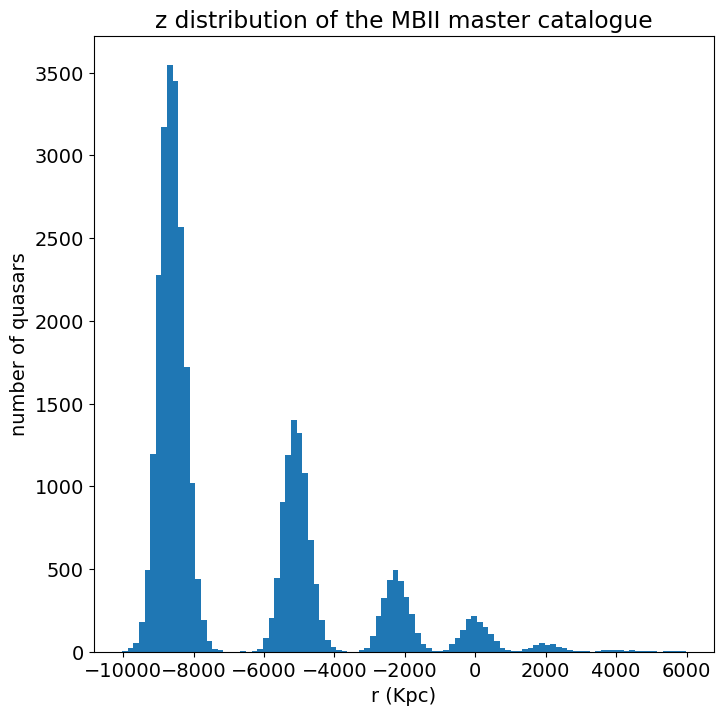

In [6]:
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(bh_pos_z_master, bins=100);
ax.set_xlabel(r'r (Kpc)')
ax.set_ylabel('number of quasars')
ax.set_title('z distribution of the MBII master catalogue')
#Master catalogue combines the z~4 to z~10 narrow MBII catalogues

[Warning] The CPU supports AVX2 but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports AVX but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports SSE4.2 but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports SSE4.1 but the compiler does not.  Can you try another compiler?
[Warning] The CPU supports SSSE3 but the compiler does not.  Can you try another compiler?


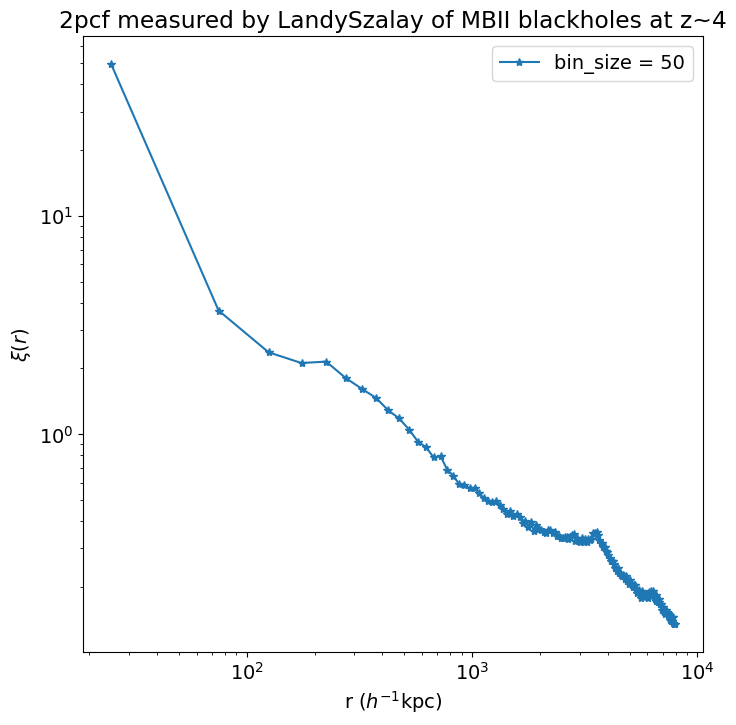

In [11]:
min_x = 0
max_x = 100000
min_y = 0
max_y = 100000

fig, ax = plt.subplots(figsize = (8,8))

mult = 50 ## Number of random points used as a multiple of number of data points
z_bin_size = 5   ## Bin size used to produce a new z distribution of the random numbers
bin_size_ar = [50]  ## Bin size used for correlation function measurement

for bin_size in bin_size_ar:

    n_D = len(bh_pos_x_master)
    n_rand = mult * n_D
    rand_x = np.random.uniform(min_x, max_x, n_rand)
    rand_y = np.random.uniform(min_y, max_y, n_rand)

    #-------------------------------------------------------------------------------------------
    #Drawing random numbers for z from smoothed distribution of the data z vals

    z_bin = np.arange(np.min(bh_pos_z_master), np.max(bh_pos_z_master), z_bin_size)[:,np.newaxis]
    z_bin_mid = (z_bin + z_bin_size/2)[:-1]  #Midpoints of the z_bin
    kde = KernelDensity(kernel="gaussian", bandwidth=50).fit(bh_pos_z_master[:,np.newaxis])
    log_dens = kde.score_samples(z_bin_mid)
    pdf = np.exp(log_dens)
    # ax.fill(pos_z[:, 0], pdf, fc="#AAAAFF")
    cdf = np.cumsum(pdf)
    cdf = cdf / np.max(cdf)
    cdf = np.insert(cdf, 0, 0)

    z_bin = z_bin.flatten()
    z_bin_mid = z_bin_mid.flatten()

    uni_val = np.random.rand(n_rand)
    bin_indices = np.searchsorted(cdf, uni_val)
    bin_edges = z_bin[bin_indices - 1]
    bin_diff = z_bin[bin_indices] - z_bin[bin_indices-1]
    bin_weights = (uni_val - cdf[bin_indices-1]) / (cdf[bin_indices] - cdf[bin_indices-1])
    rand_z = bin_edges + bin_weights * bin_diff

    ## ---------------------------------------------------------------------------------------------------------------------------------------------------

    bins = np.arange(0, 8000, bin_size)
    bin_mids = (bins[0:-1] + bins[1:])/2

    result_DD = DD(autocorr=1, nthreads=1, binfile=bins, X1 = bh_pos_x_master, Y1 = bh_pos_y_master, Z1 = bh_pos_z_master, periodic=False)
    result_RR = DD(autocorr=1, nthreads=1, binfile=bins, X1 = rand_x, Y1 = rand_y, Z1 = rand_z, periodic=False)
    result_DR = DD(autocorr=0, nthreads=1, binfile=bins, X1 = bh_pos_x_master, Y1 = bh_pos_y_master, Z1 = bh_pos_z_master, X2 = rand_x, Y2 = rand_y, Z2 = rand_z, periodic=False)

    DD_norm = (n_D * (n_D - 1))/2
    RR_norm = (n_rand * (n_rand - 1))/2
    DR_norm = n_D * n_rand

    DD_count = result_DD['npairs']/2
    RR_count = result_RR['npairs']/2
    DR_count = result_DR['npairs']

    LandSzal2pcf = (DD_count/DD_norm - 2 * DR_count/DR_norm + RR_count/RR_norm)/(RR_count/RR_norm)

    ax.plot(bin_mids, LandSzal2pcf, '-*', label="bin_size = {}".format(bin_size))

ax.set_xlabel(r'r ($h^{-1}$kpc)')
ax.set_ylabel(r'$\xi(r)$')
ax.set_title("2pcf measured by LandySzalay of MBII blackholes at z~4")
ax.set_xscale('log')
ax.set_yscale('log')

temp_popt, temp_pcov = spo.curve_fit(pow_func, bin_mids, LandSzal2pcf)
_2pcf_fit_alpha = temp_popt[1]
_2pcf_fit_A = temp_popt[0]
# ax.plot(bin_mids, pow_func(bin_mids, _2pcf_fit_A, _2pcf_fit_alpha), label=r"plaw Fit: A = {}, $\alpha = {}$".format(np.round(_2pcf_fit_A, 3), np.round(_2pcf_fit_alpha,3)))
ax.legend()

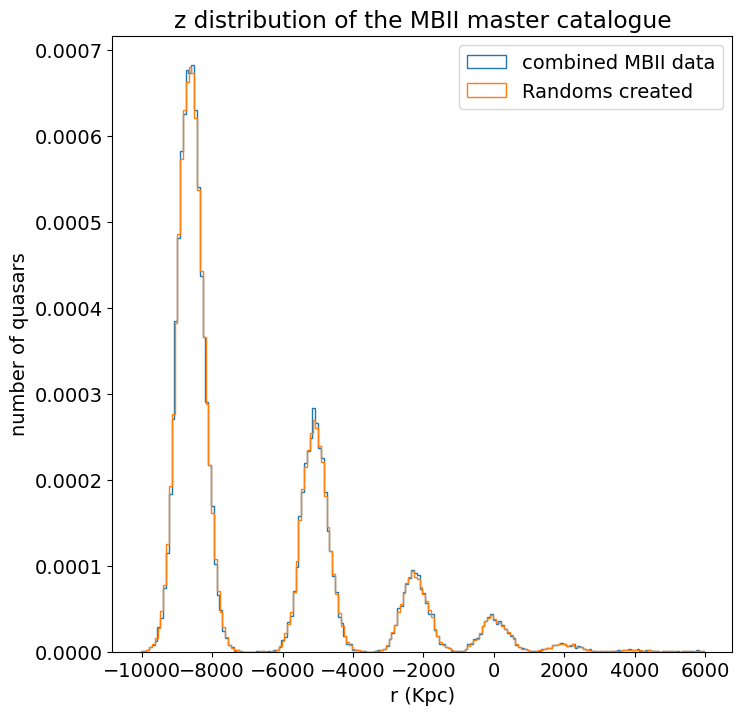

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
ax.hist(bh_pos_z_master, bins=200, density=True, histtype='step', label = "combined MBII data")
ax.hist(rand_z, bins=200, density=True, histtype='step', label = "Randoms created");
ax.set_xlabel(r'r (Kpc)')
ax.set_ylabel('number of quasars')
ax.set_title('z distribution of the MBII master catalogue')
ax.legend()
#Master catalogue combines the z~4 to z~10 narrow MBII catalogues

In [4]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

cosmo.age(7.642) - cosmo.age(30)

<Quantity 0.57032443 Gyr>

In [5]:
cosmo.age(7.642)

<Quantity 0.6688272 Gyr>